In [42]:
!pip install yfinance


In [43]:
!pip install matplotlib


In [44]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,0.0,0.0
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,0.0,0.0
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,0.0,0.0


In [45]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00',
               '2024-09-12 00:00:00-04:00', '2024-09-13 00:00:00-04:00',
               '2024-09-16 00:00:00-04:00', '2024-09-17 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24294, freq=None)

<Axes: xlabel='Date'>

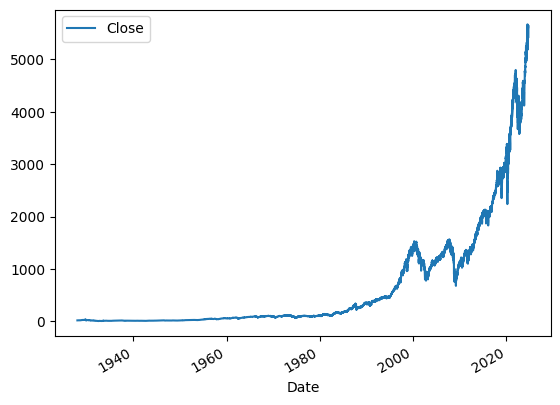

In [46]:
sp500.plot.line(y = "Close", use_index = True)

In [47]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [48]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [49]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [50]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766,1
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5626.020020,1
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,5633.089844,1


In [51]:
sp500.loc["1990-01-01":].copy()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766,1
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5626.020020,1
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,5633.089844,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

In [ ]:
//creating a testing set and a trading set as well as a model with the parameters of (numbers of trees = 100, Have at least 100 samples to split)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
//Importing a precision score metric to better train the model

In [ ]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test["Target"], preds)